Project: Capstone Project - Inferential Statistics 2 - 6 Hours

At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you have learned to explore the data. For example, are there variables that are particularly significant in terms of explaining the answer to your project question? Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? Submission: Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.

def rose_axis_settings(ax):
    ax.set_theta_direction('clockwise')
    ax.set_theta_zero_location('N')
    ax.set_xticklabels(['', '', 'E', '', 'S', '', 'W', ''])
    ax.set_yticklabels('')

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121, projection='polar')
ax2 = fig.add_subplot(122, projection='polar')
ax1.bar(np.radians(energy_wind_roses.index.values), energy_wind_roses.dir, width=np.radians(360.0/energy_wind_roses.shape[0]+1), color=edf_green)
ax2.bar(np.radians(energy_wind_roses.index.values), energy_wind_roses.energy, width=np.radians(360.0/energy_wind_roses.shape[0]+1), color=edf_blue)
[rose_axis_settings(ax) for ax in [ax1,ax2]]
ax1.set_title('Wind Rose')
ax2.set_title('Energy Rose')
plt.tight_layout()
plt.show()

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt

In [2]:
data = [pd.read_csv('asos_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_df= pd.concat(data)
print(asos_df.head())

data = [pd.read_csv('snotel_df.dat', parse_dates = True, index_col = 'Date_Time')]
snotel_df= pd.concat(data)
print(snotel_df.head())

                     Temperature_degC  Dewpoint_degC  Pressure_hp  \
Date_Time                                                           
2006-01-01 01:00:00              -1.0           -7.0          NaN   
2006-01-01 02:00:00              -3.0           -8.0          NaN   
2006-01-01 03:00:00              -4.0           -8.0          NaN   
2006-01-01 04:00:00              -4.0           -9.0          NaN   
2006-01-01 05:00:00              -5.0           -8.0          NaN   

                     WindDirection_deg  WindSpeed_m/s  CloudCover  \
Date_Time                                                           
2006-01-01 01:00:00              220.0            7.7         NaN   
2006-01-01 02:00:00              230.0            5.1         NaN   
2006-01-01 03:00:00              230.0            3.6         NaN   
2006-01-01 04:00:00              240.0            6.2         NaN   
2006-01-01 05:00:00              210.0            6.2         NaN   

                     1hr_Precipi

## Determining Outliers Statistically

25.8


Text(0,0.5,'Temperature (deg C)')

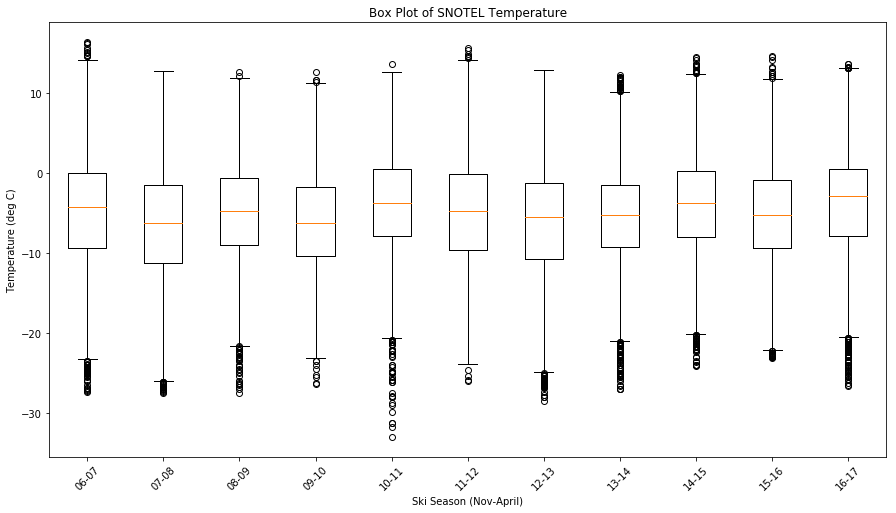

In [3]:

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = snotel_df['TOBS.I-1 (degC) '][~np.isnan(snotel_df['TOBS.I-1 (degC) '])]
filtered_data2 = [filtered_data['11-2006':'04-2007'] , filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']]
print(filtered_data.max())
plot =ax.boxplot(filtered_data2)
plt.title('Box Plot of SNOTEL Temperature')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Temperature (deg C)')

189.0


Text(0,0.5,'Snow Depth (inches)')

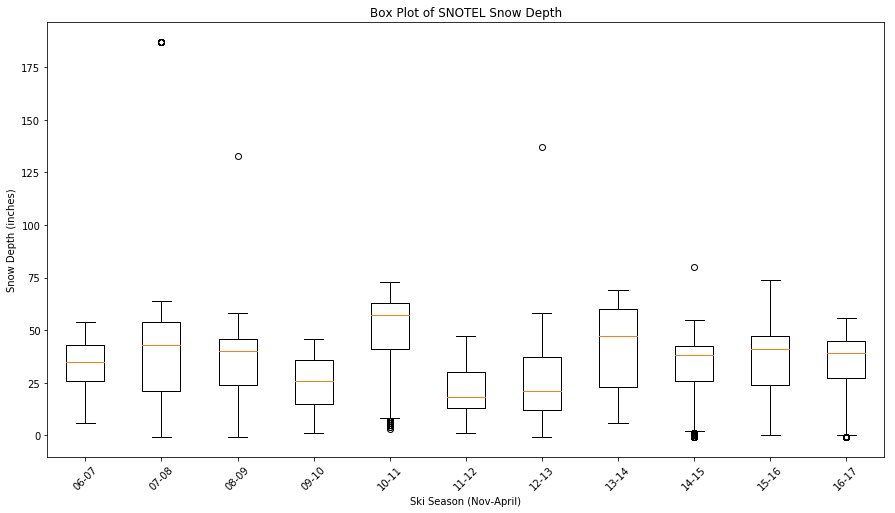

In [4]:

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = snotel_df['SNWD.I-1 (in) '][~np.isnan(snotel_df['SNWD.I-1 (in) '])]
filtered_data2 = [filtered_data['11-2006':'04-2007'] , filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']]
print(filtered_data.max())
plot =ax.boxplot(filtered_data2)
plt.title('Box Plot of SNOTEL Snow Depth')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Snow Depth (inches)')

       TOBS.I-1 (degC)   SNWD.I-1 (in) 
count     104027.000000    91266.000000
mean           1.364769       21.237504
std            9.123291       21.391880
min          -33.100000     -196.000000
25%           -5.000000        0.000000
50%            1.300000       18.000000
75%            7.700000       39.000000
max           25.800000      189.000000


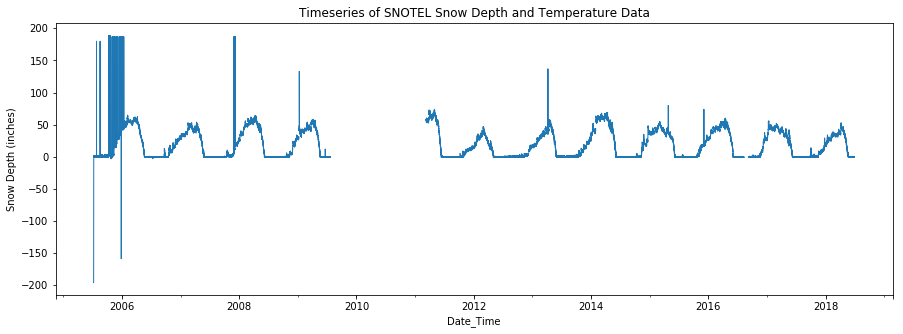

In [5]:
print(snotel_df.describe())

#years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

#for j in years:
plt.figure(figsize=(15,5))
    
ax1 = snotel_df['SNWD.I-1 (in) '].plot(use_index=True, linewidth=1)
ax1.set_ylabel("Date")
ax1.set_ylabel("Snow Depth (inches)")
ax1.set_title("Timeseries of SNOTEL Snow Depth and Temperature Data")
  
#ax2 = snotel_df['TOBS.I-1 (degC) '].plot(use_index=True, secondary_y = True, marker='.', markersize = 0.25)
#ax2.set_ylabel("Observed Temperature (deg C)", rotation = -90)
    
#Create legend
#h1, l1 = ax1.get_legend_handles_labels()
#h2, l2 = ax2.get_legend_handles_labels()
#ax1.legend(h1+h2, l1+l2, loc=2)
      
#    plt.savefig('SNWD_TOBS_'+ '%04s' % (j) +'.png')

plt.show()

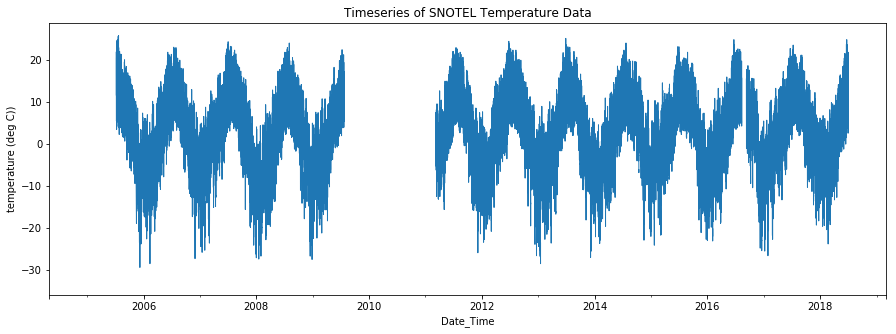

In [6]:
#years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

#for j in years:
plt.figure(figsize=(15,5))
    
ax1 = snotel_df['TOBS.I-1 (degC) '].plot(use_index=True, linewidth=1)
ax1.set_ylabel("Date")
ax1.set_ylabel("temperature (deg C))")
ax1.set_title("Timeseries of SNOTEL Temperature Data")
  
#ax2 = snotel_df['TOBS.I-1 (degC) '].plot(use_index=True, secondary_y = True, marker='.', markersize = 0.25)
#ax2.set_ylabel("Observed Temperature (deg C)", rotation = -90)
    
#Create legend
#h1, l1 = ax1.get_legend_handles_labels()
#h2, l2 = ax2.get_legend_handles_labels()
#ax1.legend(h1+h2, l1+l2, loc=2)
      
#    plt.savefig('SNWD_TOBS_'+ '%04s' % (j) +'.png')

plt.show()

## Is there a correlation between snowfall and wind speed?

In [7]:
xx=(snotel_df['SNWD.I-1 (in) ']<-100) | (snotel_df['SNWD.I-1 (in) ']>100) | (snotel_df['SNWD.I-1 (in) ']['2015']>70)
snotel_df['SNWD.I-1 (in) '][xx]=np.NaN
snotel_filled_df = snotel_df.interpolate(limit=3)
asos_filled_df = asos_df.interpolate(limit=3)

#Now calculate 12-snowfall column by finding difference between 12-hr snow depth observations 
snotel_filled_df['12hr_SNWD'] = snotel_filled_df['SNWD.I-1 (in) '].resample('12H').last()
snotel_filled_df['12hr-SNOWFALL'] = snotel_filled_df['12hr_SNWD']-snotel_filled_df['12hr_SNWD'].shift(+12)
#only keep snowfall totals 3 or more"
#zz=(snotel_filled_df['12hr-SNOWFALL']<3)
#snotel_filled_df['12hr-SNOWFALL'][zz]=0

asos_snotel_df = pd.merge(snotel_filled_df, asos_filled_df, on='Date_Time', how='outer')
print(asos_snotel_df.keys())

Index(['TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ', '12hr_SNWD', '12hr-SNOWFALL',
       'Temperature_degC', 'Dewpoint_degC', 'Pressure_hp', 'WindDirection_deg',
       'WindSpeed_m/s', 'CloudCover', '1hr_Precipitation_mm',
       '6hr_Precipitation_mm'],
      dtype='object')


Date_Time
2005-01-01 00:00:00   NaN
2005-01-01 12:00:00   NaN
2005-01-02 00:00:00   NaN
2005-01-02 12:00:00   NaN
2005-01-03 00:00:00   NaN
2005-01-03 12:00:00   NaN
2005-01-04 00:00:00   NaN
2005-01-04 12:00:00   NaN
2005-01-05 00:00:00   NaN
2005-01-05 12:00:00   NaN
2005-01-06 00:00:00   NaN
2005-01-06 12:00:00   NaN
2005-01-07 00:00:00   NaN
2005-01-07 12:00:00   NaN
2005-01-08 00:00:00   NaN
2005-01-08 12:00:00   NaN
2005-01-09 00:00:00   NaN
2005-01-09 12:00:00   NaN
2005-01-10 00:00:00   NaN
2005-01-10 12:00:00   NaN
2005-01-11 00:00:00   NaN
2005-01-11 12:00:00   NaN
2005-01-12 00:00:00   NaN
2005-01-12 12:00:00   NaN
2005-01-13 00:00:00   NaN
2005-01-13 12:00:00   NaN
2005-01-14 00:00:00   NaN
2005-01-14 12:00:00   NaN
2005-01-15 00:00:00   NaN
2005-01-15 12:00:00   NaN
                       ..
2018-06-16 00:00:00   NaN
2018-06-16 12:00:00   NaN
2018-06-17 00:00:00   NaN
2018-06-17 12:00:00   NaN
2018-06-18 00:00:00   NaN
2018-06-18 12:00:00   NaN
2018-06-19 00:00:00   NaN
20

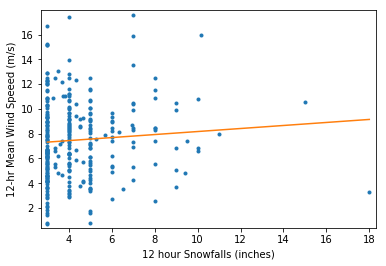

In [8]:
snf_df=asos_snotel_df['12hr-SNOWFALL']
snf_df[asos_snotel_df['12hr-SNOWFALL']<3] = np.NaN

ws_df = asos_snotel_df['WindSpeed_m/s'].resample('12H').mean()

print(ws_df, snf_df)

#snf_ws_df = pd.merge(sn, asos_filled_df, on='Date_Time', how='outer')

idx = np.isfinite(ws_df) & np.isfinite(snf_df)

# Plot the snowfall vs temperature
_ = plt.plot(snf_df[idx], ws_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('12 hour Snowfalls (inches)')
_ = plt.ylabel('12-hr Mean Wind Speeed (m/s)')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(snf_df[idx], ws_df[idx], 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

print(a,b)

# Make theoretical line to plot
x = np.array([np.min(snf_df[idx]),np.max(snf_df[idx])])
y = a * x + b
_ = plt.plot(x, y)

In [9]:
plt.figure(figsize=(10,10))



snf_df=asos_snotel_df['12hr-SNOWFALL']
snf_df[asos_snotel_df['12hr-SNOWFALL']<3] = np.NaN
pr_df = asos_snotel_df['Pressure_hp'].resample('12H').mean()

print(asos_snotel_df['Pressure_hp'].max())

nan


<Figure size 720x720 with 0 Axes>

slope = 0.08135667364991676 children per woman / percent illiterate
intercept = 6.379402651344052 children per woman
0.08135667364991676 6.379402651344052


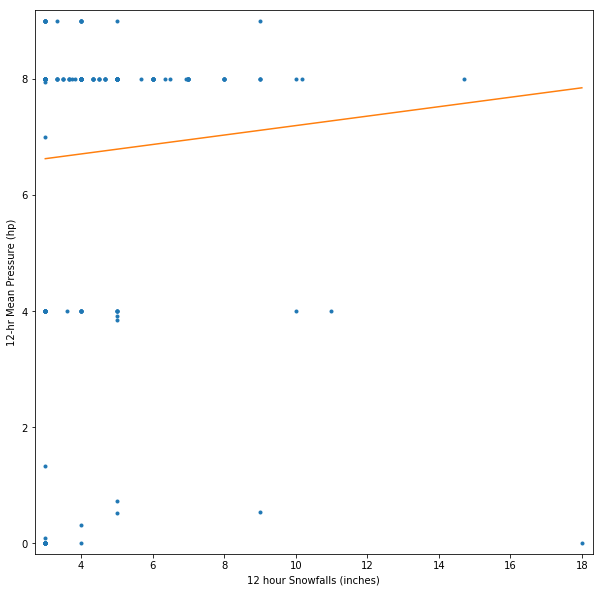

In [16]:
plt.figure(figsize=(10,10))



snf_df=asos_snotel_df['12hr-SNOWFALL']
snf_df[asos_snotel_df['12hr-SNOWFALL']<3] = np.NaN
temp_df = asos_snotel_df['CloudCover'].resample('12H').max()



idx = np.isfinite(temp_df) & np.isfinite(snf_df)

# Plot the snowfall vs temperature
_ = plt.plot(snf_df[idx], temp_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('12 hour Snowfalls (inches)')
_ = plt.ylabel('12-hr Mean Pressure (hp)')


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(snf_df[idx], temp_df[idx], 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

print(a,b)

# Make theoretical line to plot
x = np.array([np.min(snf_df[idx]),np.max(snf_df[idx])])
y = a * x + b
_ = plt.plot(x, y)

slope = 0.001170877180245809 children per woman / percent illiterate
intercept = -4.677069911089845 children per woman
0.001170877180245809 -4.677069911089845


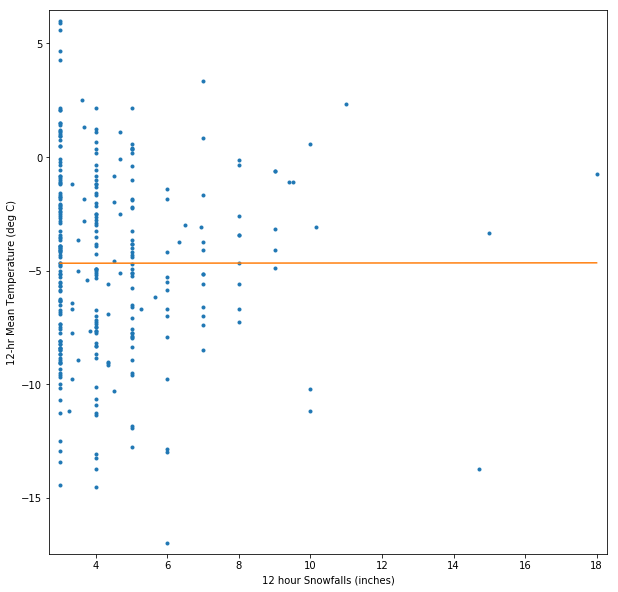

In [11]:
plt.figure(figsize=(10,10))



snf_df=asos_snotel_df['12hr-SNOWFALL']
snf_df[asos_snotel_df['12hr-SNOWFALL']<3] = np.NaN
temp_df = asos_snotel_df['Temperature_degC'].resample('12H').mean()



idx = np.isfinite(temp_df) & np.isfinite(snf_df)

# Plot the snowfall vs temperature
_ = plt.plot(snf_df[idx], temp_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('12 hour Snowfalls (inches)')
_ = plt.ylabel('12-hr Mean Temperature (deg C)')


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(snf_df[idx], temp_df[idx], 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

print(a,b)

# Make theoretical line to plot
x = np.array([np.min(snf_df[idx]),np.max(snf_df[idx])])
y = a * x + b
_ = plt.plot(x, y)

In [12]:
#WD = 360
#u_east = np.mean(np.sin(WD * np.pi/180))
#u_north = np.mean(np.cos(WD * np.pi/180))
#unit_WD = np.arctan2(u_east, u_north)
#unit_WD = (360 + unit_WD) % 360

#print(unit_WD)
from math import sin,cos,atan2,pi
import numpy as np
def meanangle(angles,weights=0,setting='degrees'):
    '''computes the mean angle'''
    if weights==0:
         weights=np.ones(len(angles))
    sumsin=0
    sumcos=0
    if setting=='degrees':
        angles=np.array(angles)*pi/180
    for i in range(len(angles)):
        sumsin+=weights[i]/sum(weights)*sin(angles[i])
        sumcos+=weights[i]/sum(weights)*cos(angles[i])
    average=atan2(sumsin,sumcos)
    if setting=='degrees':
        average=average*180/pi
    return average

print(meanangle([0,179]))

print(np.cos([0,45,90, 135, 180, 225, 270, 315, 360 ]))


89.50000000000011
[ 1.          0.52532199 -0.44807362 -0.99608784 -0.59846007  0.36731937
  0.98438195  0.6669156  -0.28369109]
